In [1]:
import os 
import pandas as pd
df = pd.read_csv('input/attacks.csv',encoding='latin-1')

In [ ]:
df

In [2]:
print(df.columns.values)

['Case Number' 'Date' 'Year' 'Type' 'Country' 'Area' 'Location' 'Activity'
 'Name' 'Sex ' 'Age' 'Injury' 'Fatal (Y/N)' 'Time' 'Species '
 'Investigator or Source' 'pdf' 'href formula' 'href' 'Case Number.1'
 'Case Number.2' 'original order' 'Unnamed: 22' 'Unnamed: 23']


In [ ]:
 df.Year.value_counts()

In [3]:
df["Species "].value_counts().head(50)

White shark                                           163
Shark involvement prior to death was not confirmed    105
Invalid                                               102
Shark involvement not confirmed                        88
Tiger shark                                            73
Shark involvement prior to death unconfirmed           68
Bull shark                                             52
6' shark                                               40
4' shark                                               40
Questionable incident                                  35
1.8 m [6'] shark                                       35
Questionable                                           34
1.5 m [5'] shark                                       32
1.2 m [4'] shark                                       27
5' shark                                               26
3' shark                                               26
2 m shark                                              25
4' to 5' shark

In [ ]:
df["Injury"].value_counts().head(40)

In [ ]:
df.Country.describe()

In [4]:
# remove null "Year" values
df_clean=df.drop(['Case Number.1', 'Case Number.2','href formula', 'Unnamed: 22','Unnamed: 23'], axis=1)

In [5]:
print(df_clean.columns.values)

['Case Number' 'Date' 'Year' 'Type' 'Country' 'Area' 'Location' 'Activity'
 'Name' 'Sex ' 'Age' 'Injury' 'Fatal (Y/N)' 'Time' 'Species '
 'Investigator or Source' 'pdf' 'href' 'original order']


In [6]:
df_clean=df_clean.drop_duplicates()

In [ ]:

df_h1.groupby(["Activity"]).describe()


In [ ]:
df_clean["Species "]=df_clean["Species "].dropna()


In [8]:
df_clean["Species "].dropna()

0                                             White shark
3                                               2 m shark
4                                         Tiger shark, 3m
6                                             Tiger shark
7                                         Lemon shark, 3'
                              ...                        
6276                                      12' tiger shark
6293                                         Blue pointer
6294                                         Blue pointer
6295                                        Blue pointers
6296    Said to involve a grey nurse shark that leapt ...
Name: Species , Length: 3464, dtype: object

In [9]:
import re
df_clean["Species "].str.contains('White|white', regex=True )

0         True
1          NaN
2          NaN
3        False
4        False
         ...  
6307       NaN
6308       NaN
6309       NaN
8702       NaN
25722      NaN
Name: Species , Length: 6312, dtype: object

In [12]:
import numpy as np
df_clean["Specie_white"]=np.where(df_clean["Species "].str.contains('White|white', regex=True ), "White Shark", "others")

In [15]:
df_clean["Specie_white"].dropna().value_counts()

White Shark    3515
others         2797
Name: Specie_white, dtype: int64

In [19]:
df_h1=df_clean[["Country","Fatal (Y/N)","Specie_white"]].dropna()
df_h1

,Country,Fatal (Y/N),Specie_white
0,USA,N,White Shark
1,USA,N,White Shark
2,USA,N,White Shark
3,AUSTRALIA,N,others
4,MEXICO,N,others
...,...,...,...
6297,AUSTRALIA,Y,White Shark
6298,AUSTRALIA,Y,White Shark
6299,USA,Y,White Shark
6300,PANAMA,Y,White Shark


In [25]:
df_h1["Country"].value_counts()

USA                          2041
AUSTRALIA                    1225
SOUTH AFRICA                  515
PAPUA NEW GUINEA              132
NEW ZEALAND                   116
                             ... 
ALGERIA                         1
PERU                            1
SAN DOMINGO                     1
SOLOMON ISLANDS / VANUATU       1
TASMAN SEA                      1
Name: Country, Length: 202, dtype: int64

In [35]:
df_h1[df_h1.Specie_white == "White Shark"][["Country","Fatal (Y/N)"]]

,Country,Fatal (Y/N)
0,USA,N
1,USA,N
2,USA,N
5,AUSTRALIA,N
9,USA,N
...,...,...
6297,AUSTRALIA,Y
6298,AUSTRALIA,Y
6299,USA,Y
6300,PANAMA,Y


In [67]:
df_h1p1=df_h1[df_h1["Fatal (Y/N)"] == "Y"][["Country","Specie_white"]]
df_h1p1["Specie_white"].value_counts()

White Shark    1091
others          273
Name: Specie_white, dtype: int64

In [ ]:
df_h1p2=

In [69]:

m =  df_h1[df_clean["Specie_white"] =="White Shark"]
fatal = m[m["Fatal (Y/N)"=="Y"].groupby("Country")].agg[{"Specie_white":'count'}]



/Users/beatrizmedialdeamontes/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


KeyError: False

In [74]:
df_h1p4=df_h1[df_h1["Fatal (Y/N)"].filter(like='N', axis=0)]

In [64]:
df_h1["Fatal (Y/N)"].describe()

count     5718
unique       8
top          N
freq      4274
Name: Fatal (Y/N), dtype: object

In [66]:
df_h1[Fatales]=df_h1[df_h1["Fatal (Y/N)"]=='Y']

NameError: name 'Fatales' is not defined

      index             Country Specie_white
0         6              BRAZIL       others
1        58          COSTA RICA       others
2        59               LIBYA       others
3        64                CUBA       others
4        91        SOUTH AFRICA  White Shark
...     ...                 ...          ...
1359   6297           AUSTRALIA  White Shark
1360   6298           AUSTRALIA  White Shark
1361   6299                 USA  White Shark
1362   6300              PANAMA  White Shark
1363   6301  CEYLON (SRI LANKA)  White Shark

[1364 rows x 3 columns]


,index
Specie_white,
White Shark,1091
others,273


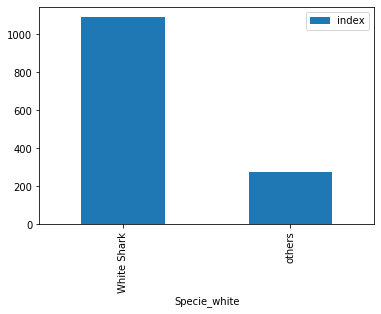

In [104]:
%matplotlib inline
pruebita= df_h1[df_h1["Fatal (Y/N)"] == "Y"][["Country","Specie_white"]].reset_index()
print(pruebita)

tiburon_blanco= pruebita.groupby("Specie_white").agg({"index":"count"})



display(tiburon)
pruebgruop.plot.bar()


In [94]:
df_h1["Specie_white"].describe()

count            5718
unique              2
top       White Shark
freq             3438
Name: Specie_white, dtype: object

In [106]:
df_clean["Type"].value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [57]:

df_h3=df_clean[df_clean.replace({'Species ': r'^\d+'}, {'Species ': 'Unknown'}, regex=True)]

ValueError: Boolean array expected for the condition, not object